In [5]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim 
import torch.nn.init as init

In [6]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [7]:
!unzip Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: mnist_middle_columns/26957.jpg  
  inflating: mnist_middle_columns/83.csv  
  inflating: mnist_middle_columns/4921.csv  
  inflating: mnist_middle_columns/34436.jpg  
  inflating: mnist_middle_columns/28228.csv  
  inflating: mnist_middle_columns/11910.csv  
  inflating: mnist_middle_columns/24492.jpg  
  inflating: mnist_middle_columns/32617.jpg  
  inflating: mnist_middle_columns/57638.csv  
  inflating: mnist_middle_columns/37617.csv  
  inflating: mnist_middle_columns/35601.jpg  
  inflating: mnist_middle_columns/42223.csv  
  inflating: mnist_middle_columns/24519.csv  
  inflating: mnist_middle_columns/40571.csv  
  inflating: mnist_middle_columns/54769.jpg  
  inflating: mnist_middle_columns/32591.jpg  
  inflating: mnist_middle_columns/37102.jpg  
  inflating: mnist_middle_columns/1624.jpg  
  inflating: mnist_middle_columns/37890.jpg  
  inflating: mnist_middle_columns/4648.csv  
  inflating: mnist_middle_columns/5

In [8]:
import glob 
paths = glob.glob('mnist_middle_columns/*.jpg')
# first path 
paths[0]

'mnist_middle_columns/57653.jpg'

In [9]:
# split images to train and test
split_size = 0.8
train_size = int(split_size * len(paths))
train_paths = paths[:train_size]
test_paths = paths[train_size:]
print(f'train size : {len(train_paths)}, test size : {len(test_paths)}')

train size : 48000, test size : 12000


(28, 28, 3)
(28, 28)


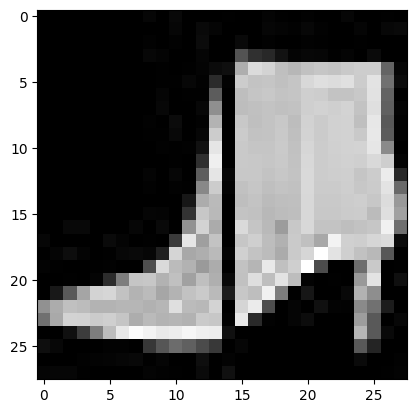

In [10]:
image = Image.open(train_paths[1])
image_array = np.array(image)
print(image_array.shape)


# convert rgb_image to grayscale_image
image_array = image_array[:,:,0]
print(image_array.shape)


plt.imshow(image_array, cmap='gray')

In [11]:
class CustomImageDataset(Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path)
        image_array = np.array(image)
        image_array = image_array[:,:,0]
        image_array = image_array/255 #convert pixcel values between 0 and 1


        
        csv_path = paths[idx].replace('.jpg','.csv')
        df = pd.read_csv(csv_path)
        target = df['0'].values
        target = torch.tensor(target)


        # flatten 2d image to 1d array
        features = image_array.reshape(28*28)
        features = torch.tensor(features)
        return features.float(), target.float()

In [12]:
train_dataset = CustomImageDataset(train_paths)
test_dateset = CustomImageDataset(test_paths)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dateset, batch_size=32, shuffle=True)
size_train=len(train_dataloader)
size_test = len(test_dataloader)

print(size_train)
print(size_test)

1500
375


In [14]:
for i_batch, sample_batched in enumerate(train_dataloader):
    if i_batch == 0:
        print(sample_batched[0].shape)
        print(sample_batched[0])
        print(sample_batched[1].shape)
        print(sample_batched[1])
    else:
        break

torch.Size([32, 784])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0078, 0.0078],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0118, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])
torch.Size([32, 28])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4471, 0.9412, 0.8549, 0.8784,
         0.8784, 0.8706, 0.8549, 0.8824, 0.1176, 0.0000, 0.0118, 0.0000, 0.0196,
         0.0000, 0.0000, 0.6431, 0.7804, 0.1216, 0.0000, 0.0196, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.6549, 0.6471, 0.5333, 0.7255, 0.5098, 0.6824, 0.7176, 0.8275, 0.0000,
         0.0314, 0.1098, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.4431, 0.3373, 0.2275, 0.29

In [15]:
#3 layer neuralnetwork

class Net(nn.Module):
    def __init__(self):
        super( Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 28)

    def forward(self, x):
        x = x.to(torch.float32)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:

##3 layer neuralnetwork with batch_normalization

class Net_batch_normalization(nn.Module):
    def __init__(self):
        super(Net_batch_normalization, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 28)

    def forward(self, x):
        x = x.to(torch.float32)
        x = nn.functional.relu(self.bn1(self.fc1(x)))
        x = nn.functional.relu(self.bn2(self.fc2(x)))
        x = nn.functional.relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

In [ ]:

##3 layer neuralnetwork with droput

class Net_dropout(nn.Module):
    def __init__(self, p=0.5):
        super(Net_dropout, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 28)
        self.dropout = nn.Dropout(p=p)

    def forward(self, x):
        x = x.to(torch.float32)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

In [ ]:
#3 layer neuralnetwork with sigmoid activition

class Net_sigmoid(nn.Module):
    def __init__(self):
        super(Net_sigmoid, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 28)

    def forward(self, x):
        x = x.to(torch.float32)
        x = nn.functional.sigmoid(self.fc1(x))
        x = nn.functional.sigmoid(self.fc2(x))
        x = nn.functional.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

In [22]:
#3 layer neuralnetwork with xavier initialization

class Net_xavier(nn.Module):
    def __init__(self):
        super(Net_xavier, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 28)

        init.xavier_uniform_(self.fc1.weight)
        init.xavier_uniform_(self.fc2.weight)
        init.xavier_uniform_(self.fc3.weight)
        init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [33]:
net=Net()
#net=Net_batch_normalization()
#net=Net_dropout()
#net=Net_sigmoid()
#net=Net_xavier()



criterion= nn.MSELoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.001)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=28, bias=True)
)

In [ ]:
no_epochs = 10

for epoch in range(no_epochs):
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
    
    
        optimizer.zero_grad()

    
        outputs = net(inputs)
       
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        print(f'epoch:{epoch + 1}, batch: {i+1},  loss: {loss.item()}')



Streaming output truncated to the last 5000 lines.
epoch:1, batch: 1493,  loss: 0.07516581565141678
epoch:1, batch: 1494,  loss: 0.07243488729000092
epoch:1, batch: 1495,  loss: 0.061613161116838455
epoch:1, batch: 1496,  loss: 0.07689714431762695
epoch:1, batch: 1497,  loss: 0.08409680426120758
epoch:1, batch: 1498,  loss: 0.07535716146230698
epoch:1, batch: 1499,  loss: 0.061082445085048676
epoch:1, batch: 1500,  loss: 0.06731569766998291
epoch:2, batch: 1,  loss: 0.08627360314130783
epoch:2, batch: 2,  loss: 0.07270807027816772
epoch:2, batch: 3,  loss: 0.07219427078962326
epoch:2, batch: 4,  loss: 0.07717009633779526
epoch:2, batch: 5,  loss: 0.07055089622735977
epoch:2, batch: 6,  loss: 0.07249905914068222
epoch:2, batch: 7,  loss: 0.06504680216312408
epoch:2, batch: 8,  loss: 0.06648586690425873
epoch:2, batch: 9,  loss: 0.08691776543855667
epoch:2, batch: 10,  loss: 0.07561488449573517
epoch:2, batch: 11,  loss: 0.06820472329854965
epoch:2, batch: 12,  loss: 0.07931827008724213


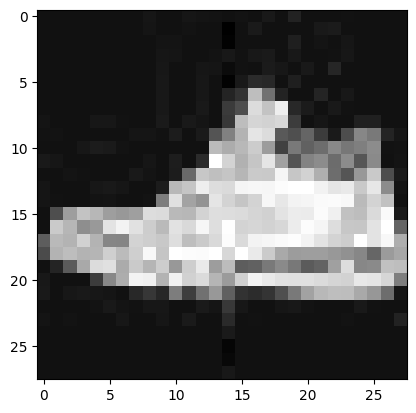

In [27]:

# fill the gap of image with real vlaue vs trined value 

inputs , labels = train_dataset[15]





inputs_num=inputs.numpy()
inputs_num=inputs_num.reshape(28,28)



labels_num=labels.numpy()
#inputs_num[:,14]=labels_num


out=net(inputs)
out_num=out.detach().numpy()
inputs_num[:,14]=out_num









plt.imshow(inputs_num , cmap='gray')

plt.show()



In [31]:

# calculate MAE  on test_dataloader
mae = 0.0 
with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            mae += torch.abs(outputs - labels).mean().item()
            
mae=mae / len(test_dataloader)
print(mae)

0.3685550363063812
